1. Tokenization > interger encoding
2. Tokenization >>Text to sequence
3. Zero padding > post/pre
4. Embedding (convert the data to dense vector)
5. SimpleRNN
6. Dense layer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import   Tokenizer
from keras.utils import pad_sequences, plot_model

!pip install visualkeras
import visualkeras

In [3]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense , SimpleRNN, Embedding, Flatten



In [4]:
(x_train, y_train), (x_test, y_test)= imdb.load_data()

#(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
x_train[5]
# the data is already encoded

[1,
 778,
 128,
 74,
 12,
 630,
 163,
 15,
 4,
 1766,
 7982,
 1051,
 43222,
 32,
 85,
 156,
 45,
 40,
 148,
 139,
 121,
 664,
 665,
 10,
 10,
 1361,
 173,
 4,
 749,
 86588,
 16,
 3804,
 8,
 4,
 226,
 65,
 12,
 43,
 127,
 24,
 15344,
 10,
 10]

In [6]:
x_train.shape

# we have 25k reviews

(25000,)

In [7]:
x_test.shape

(25000,)

In [8]:
y_train.shape

(25000,)

In [9]:
len(x_train[0])

218

In [10]:
len(x_train[1])

189

In [11]:
# padding is required for all the reviews

In [12]:
x_train= pad_sequences(x_train, padding='post',maxlen=100 )
x_test= pad_sequences(x_test,  padding='post',maxlen=100)

# when we dont give maxlen , the zero padding is given to match the max length of the sentence and it creates Sparse matrix

In [13]:
len(x_train[0])

100

In [14]:
len(x_train[5])

100

#Build the Model using Simple RNN


In [15]:
model=Sequential()
model.add(SimpleRNN(32, input_shape=(100, 1), return_sequences=False)) # output of hidden layer is not sent out when return_sequences is False as its many to one (classification)
                                                                        # return_sequences is true then it will be many to many
                                                                        # 100 is max lenth of words ,  input feature is 1
                                                                        # 32 Units *1 input feature +32*32(feedback) +32 > 1088 params

model.add(Dense(1, activation='sigmoid')) # 32* 1 +1 > 33 params
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=5)

Epoch 1/5
782/782 [==============================] - 63s 73ms/step - loss: 0.6941 - accuracy: 0.5069 - val_loss: 0.6967 - val_accuracy: 0.4988
Epoch 2/5
782/782 [==============================] - 60s 77ms/step - loss: 0.6930 - accuracy: 0.5111 - val_loss: 0.6933 - val_accuracy: 0.5104
Epoch 3/5
782/782 [==============================] - 70s 90ms/step - loss: 0.6928 - accuracy: 0.5120 - val_loss: 0.6941 - val_accuracy: 0.5098
Epoch 4/5
782/782 [==============================] - 77s 98ms/step - loss: 0.6926 - accuracy: 0.5122 - val_loss: 0.6927 - val_accuracy: 0.5118
Epoch 5/5
782/782 [==============================] - 60s 77ms/step - loss: 0.6929 - accuracy: 0.5141 - val_loss: 0.6931 - val_accuracy: 0.5075


In [ ]:
#simple RNN used without embedding gives poor accuracy


# Simple RNN with Embedding


In [17]:
x_train= pad_sequences(x_train, padding='post',maxlen=100 )
x_test= pad_sequences(x_test,  padding='post',maxlen=100)

In [19]:
x_train.shape

(25000, 100)

In [20]:
model1=Sequential()
model1.add(Embedding(10000,2, input_length=100)) #  ( vocab_size, outputdim, input length) > 10000*2> 20000 params
# embedding will give dense vector of the input data. Here for every word/vector, we are getting 2 dimension vector
model1.add(SimpleRNN(32, return_sequences=False )) # 32*2(input to neurons)+ 32*32(feedback)+32(bais) > 1120 params
model1.add(Dense(1, activation='sigmoid'))# 33 params
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2)            20000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21153 (82.63 KB)
Trainable params: 21153 (82.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)


Epoch 1/5
782/782 [==============================] - 120s 152ms/step - loss: 0.6809 - accuracy: 0.5603 - val_loss: 0.6547 - val_accuracy: 0.6096
Epoch 2/5
782/782 [==============================] - 91s 117ms/step - loss: 0.4581 - accuracy: 0.7869 - val_loss: 0.4030 - val_accuracy: 0.8274
Epoch 3/5
782/782 [==============================] - 87s 111ms/step - loss: 0.3264 - accuracy: 0.8679 - val_loss: 0.4955 - val_accuracy: 0.7516
Epoch 4/5
782/782 [==============================] - 85s 109ms/step - loss: 0.2784 - accuracy: 0.8924 - val_loss: 0.3991 - val_accuracy: 0.8382
Epoch 5/5
782/782 [==============================] - 87s 111ms/step - loss: 0.2386 - accuracy: 0.9086 - val_loss: 0.3914 - val_accuracy: 0.8352


In [ ]:
# simpe RNN with embedding is giving better result(83%) than RNN without Embedding (50%)

# LSTM Model



In [22]:
from keras.layers import LSTM
from keras.preprocessing import sequence
np.random.seed=117

In [23]:
top_words=5000
(x_train, y_train),(x_test, y_test)=imdb.load_data(num_words=top_words)


In [24]:
max(np.max(x_train))


4987

In [25]:
max(np.max(x_test))


4998

In [26]:
#padding
max_review_len=600
x_train=pad_sequences(x_train, maxlen=max_review_len)
x_test=pad_sequences(x_test,maxlen=max_review_len)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


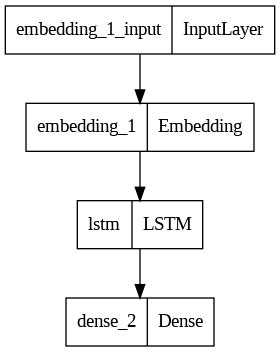

In [27]:
model2=Sequential()
model2.add(Embedding(top_words,32, input_length=600))
model2.add(LSTM(100 ))
model2.add(Dense(1, activation='sigmoid'))# 33 params
model2.summary()
#visualkeras.layered_view(model)
plot_model(model2)

In [28]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10,batch_size=64)

Epoch 1/10
391/391 [==============================] - 70s 170ms/step - loss: 0.4684 - accuracy: 0.7709 - val_loss: 0.3815 - val_accuracy: 0.8408
Epoch 2/10
391/391 [==============================] - 35s 90ms/step - loss: 0.2970 - accuracy: 0.8820 - val_loss: 0.3232 - val_accuracy: 0.8686
Epoch 3/10
391/391 [==============================] - 24s 63ms/step - loss: 0.2618 - accuracy: 0.8994 - val_loss: 0.3365 - val_accuracy: 0.8718
Epoch 4/10
391/391 [==============================] - 21s 53ms/step - loss: 0.2157 - accuracy: 0.9184 - val_loss: 0.3208 - val_accuracy: 0.8724
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.1903 - accuracy: 0.9284 - val_loss: 0.3523 - val_accuracy: 0.8746
Epoch 6/10
391/391 [==============================] - 16s 41ms/step - loss: 0.1653 - accuracy: 0.9403 - val_loss: 0.3477 - val_accuracy: 0.8709
Epoch 7/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1563 - accuracy: 0.9419 - val_loss: 0.3841 - val_accuracy

# Bidirectional LSTM

In [29]:
from keras.layers import LSTM,Bidirectional,Dropout
from keras.preprocessing import sequence
np.random.seed=117

In [30]:
top_words=5000
(x_train, y_train),(x_test, y_test)=imdb.load_data(num_words=top_words)


In [36]:


max_sequence_len = np.max([len(x) for x in x_train])
max_sequence_len

600

In [38]:
#padding
max_review_len=600
x_train=pad_sequences(x_train, maxlen=max_review_len)
x_test=pad_sequences(x_test,maxlen=max_review_len)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 600, 32)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               106400    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 266601 (1.02 MB)
Trainable params: 266601 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


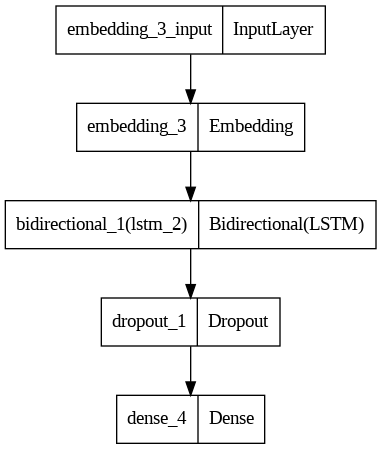

In [39]:
model3=Sequential()
model3.add(Embedding(top_words,32, input_length=600))
model3.add(Bidirectional(LSTM(100)))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))# 33 params
model3.summary()
#visualkeras.layered_view(model)
plot_model(model3)

In [40]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10,batch_size=64)

Epoch 1/10
391/391 [==============================] - 64s 153ms/step - loss: 0.4892 - accuracy: 0.7584 - val_loss: 0.3600 - val_accuracy: 0.8458
Epoch 2/10
391/391 [==============================] - 41s 104ms/step - loss: 0.3010 - accuracy: 0.8803 - val_loss: 0.3041 - val_accuracy: 0.8746
Epoch 3/10
391/391 [==============================] - 34s 87ms/step - loss: 0.2733 - accuracy: 0.8919 - val_loss: 0.3133 - val_accuracy: 0.8729
Epoch 4/10
391/391 [==============================] - 28s 73ms/step - loss: 0.2915 - accuracy: 0.8834 - val_loss: 0.3314 - val_accuracy: 0.8659
Epoch 5/10
391/391 [==============================] - 31s 79ms/step - loss: 0.2375 - accuracy: 0.9103 - val_loss: 0.3135 - val_accuracy: 0.8720
Epoch 6/10
391/391 [==============================] - 27s 69ms/step - loss: 0.1978 - accuracy: 0.9271 - val_loss: 0.3575 - val_accuracy: 0.8536
Epoch 7/10
391/391 [==============================] - 26s 67ms/step - loss: 0.1877 - accuracy: 0.9281 - val_loss: 0.3580 - val_accurac

In [64]:
from sklearn.metrics import accuracy_score
y_pred=model3.predict(x_test)>0.5
print(y_pred, y_test)
print("Accuracy of prediction on test set : ", accuracy_score(y_test,y_pred))


782/782 [==============================] - 12s 16ms/step
[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [ True]] [0 1 1 ... 0 0 0]
Accuracy of prediction on test set :  0.84652


In [65]:
true_classifications = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true_classifications += 1

print('Correct Prediction: {}'.format(true_classifications))
print('Wrong Prediction: {}'.format(len(y_pred) - true_classifications))


Correct Prediction: 21163
Wrong Prediction: 3837


**Observation**

we see that birdirectional LSTM gives very good accuracy of 86.5% after 10 epochs.  